In [1]:
import torch
import torch.nn as nn
import torch.optim as optim

In [2]:
import sklearn

In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [17]:
from sklearn.datasets import fetch_california_housing

In [18]:
data = fetch_california_housing()

In [20]:
x = data.data
y= data.target
scaler = StandardScaler()
x = scaler.fit_transform(x)
y = y.reshape(-1,1)

In [23]:
x = torch.tensor(y,dtype = torch.float32).unsqueeze(1)
y = torch.tensor(y,dtype = torch.float32)

In [28]:
class LSTMNet(nn.Module):
    def __init__(self,input_size,hidden_size,output_size):
        super(LSTMNet,self).__init__()
        self.lstm = nn.LSTM(input_size,hidden_size,batch_first = True)
        self.fc = nn.Linear(hidden_size,output_size)
    def forward(self,x):
        out,_ = self.lstm(x)
        out = self.fc(out[:,-1, :])
        return out

input_size = x.shape[2]
hidden_size = 32
output_size = 1
model = LSTMNet(input_size,hidden_size,output_size)

criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(),lr=0.001)

num_epochs = 10000
loss_list = []
for epoch in range(num_epochs):
    optimizer.zero_grad()
    outputs = model(x)
    loss = criterion(outputs,y)
    loss.backward()
    optimizer.step()

    if (epoch+1) %100 == 0:
        loss_list.append(loss.item())
        print(f'Epoch[{epoch+1}/{num_epochs}],Loss:{loss.item()}')

Epoch[100/10000],Loss:1.707480549812317
Epoch[200/10000],Loss:0.33841657638549805
Epoch[300/10000],Loss:0.18300603330135345
Epoch[400/10000],Loss:0.07062452286481857
Epoch[500/10000],Loss:0.020373433828353882
Epoch[600/10000],Loss:0.00801954884082079
Epoch[700/10000],Loss:0.005796372424811125
Epoch[800/10000],Loss:0.00497811334207654
Epoch[900/10000],Loss:0.004374510142952204
Epoch[1000/10000],Loss:0.003879982978105545
Epoch[1100/10000],Loss:0.003466337453573942
Epoch[1200/10000],Loss:0.00311649264767766
Epoch[1300/10000],Loss:0.0028200733941048384
Epoch[1400/10000],Loss:0.0025697117671370506
Epoch[1500/10000],Loss:0.0023592545185238123
Epoch[1600/10000],Loss:0.0021830766927450895
Epoch[1700/10000],Loss:0.002036038087680936
Epoch[1800/10000],Loss:0.0019134453032165766
Epoch[1900/10000],Loss:0.0018110894598066807
Epoch[2000/10000],Loss:0.0017252934630960226
Epoch[2100/10000],Loss:0.0016528210835531354
Epoch[2200/10000],Loss:0.001590942032635212
Epoch[2300/10000],Loss:0.00153734104242175

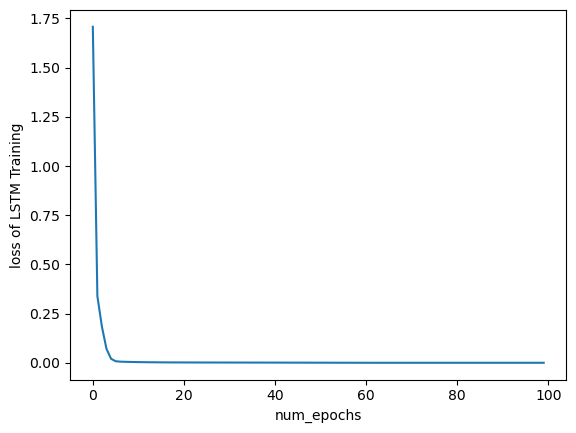

In [29]:
plt.plot(range(100),loss_list)
plt.xlabel('num_epochs')
plt.ylabel('loss of LSTM Training')
plt.show()